# Exploration Notebook

Inspired by [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart)

### Description of competition

What products will be reordered...

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
color = sns.color_palette()
fs = 14

%matplotlib inline

data_dir = 'data'

I have gathered the competition files in a **data** folder. Let's see what we have

In [139]:
from subprocess import check_output
print(check_output(["ls", data_dir]).decode("utf8"))

aisles.csv
departments.csv
order_products__prior.csv
order_products__train.csv
orders.csv
products.csv
sample_submission.csv



Import the files

In [140]:
order_products_train_df = pd.read_csv(data_dir + "/order_products__train.csv")
order_products_prior_df = pd.read_csv(data_dir + "/order_products__prior.csv")
orders_df = pd.read_csv(data_dir + "/orders.csv")
products_df = pd.read_csv(data_dir + "/products.csv")
aisles_df = pd.read_csv(data_dir + "/aisles.csv")
departments_df = pd.read_csv(data_dir + "/departments.csv")

In [6]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


Overview of order files
* **Orders** (orders.csv): Blablabla
* **Orders prior** (order_products_prior.csv): Blablabla
* **Orders train** (order_products_train.csv): Blablabla

In [83]:
def annotate_bars(ax,fontsize=12,offset=0):
    '''
    Function to get annotated bars
    '''
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + offset,
            '{:1.0f}'.format(height),
            ha="center",fontsize=fontsize)

Blabla

(0, 3500)

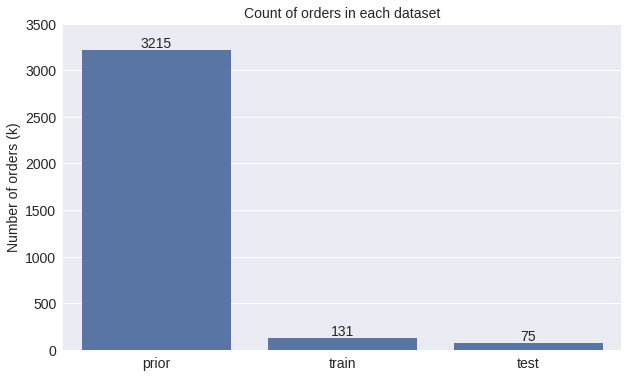

In [107]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(10,6))
ax = sns.barplot(cnt_srs.index, cnt_srs.values/1000,color=color[0])

annotate_bars(ax,fontsize=fs,offset=25)

plt.ylabel('Number of orders (k)',fontsize=14)
plt.title('Count of orders in each dataset',fontsize=fs)

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.ylim(0,3500)

Blabla

(0, 250)

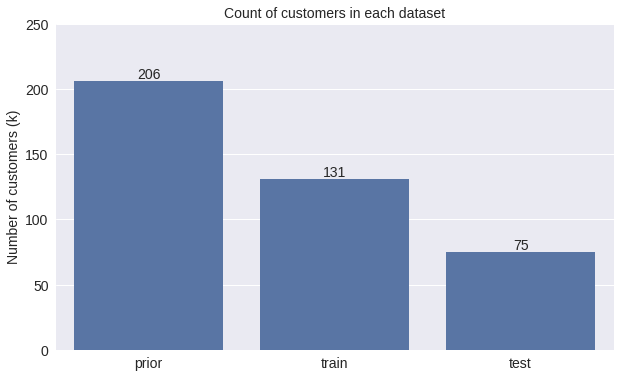

In [89]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs = cnt_srs.reindex(index = ['prior','train','test'])

plt.figure(figsize=(10,6))
ax = sns.barplot(cnt_srs.index, cnt_srs.values/1000,color=color[0])

annotate_bars(ax,fontsize=fs,offset=2)

plt.xlabel("")
plt.ylabel('Number of customers (k)',fontsize=fs)
plt.title('Count of customers in each dataset',fontsize=fs)

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.ylim(0,250)

Number of orders per customer

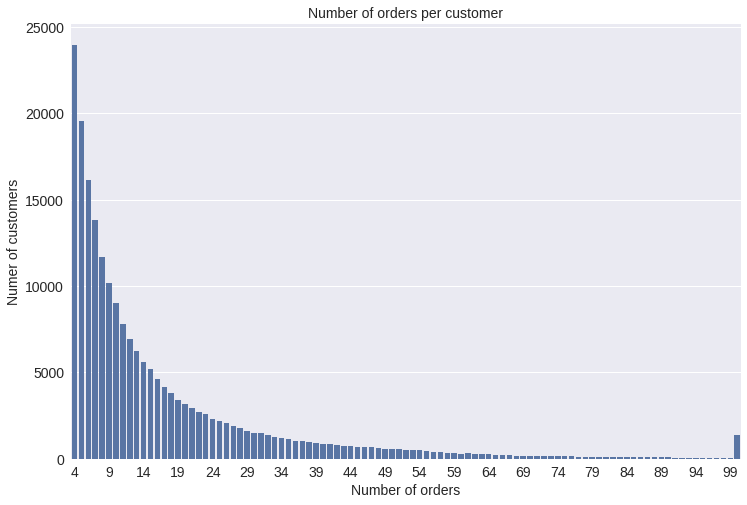

In [106]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
ax = sns.barplot(cnt_srs.index, cnt_srs.values, color=color[0])

plt.title("Number of orders per customer",fontsize=fs)
plt.ylabel('Numer of customers', fontsize=fs)
plt.xlabel('Number of orders', fontsize=fs)

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

# Set every 5th label to visible
for label in ax.xaxis.get_ticklabels():
    label.set_visible(False)
for label in ax.xaxis.get_ticklabels()[::5]:
    label.set_visible(True)

Capped data?

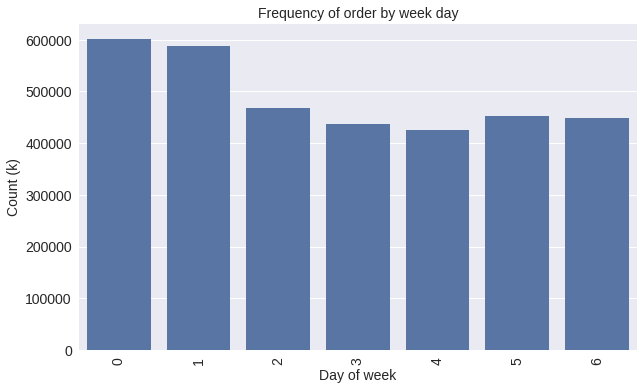

In [114]:
plt.figure(figsize=(10,6))
sns.countplot(x="order_dow", data=orders_df, color=color[0])

plt.ylabel('Count (k)', fontsize=fs)
plt.xlabel('Day of week', fontsize=fs)

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=fs)

Blabla

(0, 700)

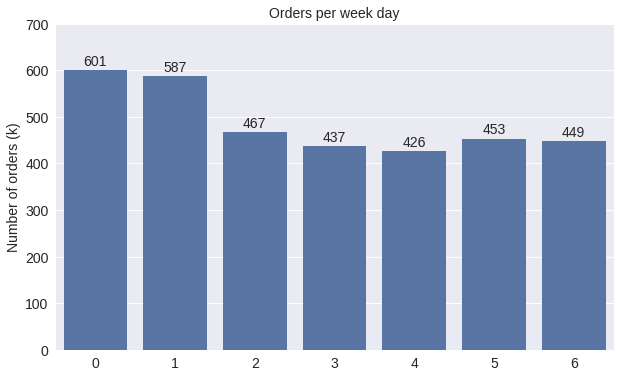

In [126]:
cnt_srs = orders_df.groupby("order_dow")['order_id'].aggregate('count')

plt.figure(figsize=(10,6))
ax = sns.barplot(cnt_srs.index, cnt_srs.values/1000,color=color[0])

annotate_bars(ax,fontsize=fs,offset=10)

plt.xlabel("")
plt.ylabel('Number of orders (k)',fontsize=fs)
plt.title('Orders per week day',fontsize=fs)

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.ylim(0,700)

Seems to be a weekly trend

(0, 400)

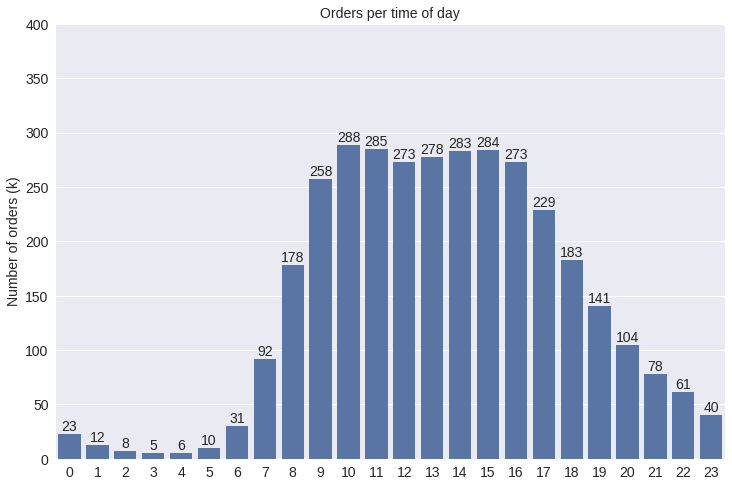

In [132]:
cnt_srs = orders_df.groupby("order_hour_of_day")['order_id'].aggregate('count')

plt.figure(figsize=(12,8))
ax = sns.barplot(cnt_srs.index, cnt_srs.values/1000,color=color[0])

annotate_bars(ax,fontsize=fs,offset=3)

plt.xlabel("")
plt.ylabel('Number of orders (k)',fontsize=fs)
plt.title('Orders per time of day',fontsize=fs)

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.ylim(0,400)

Blabla

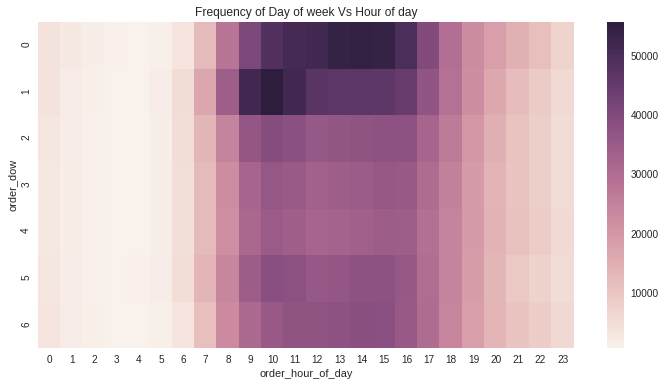

In [133]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")

Blabla

(0, 400)

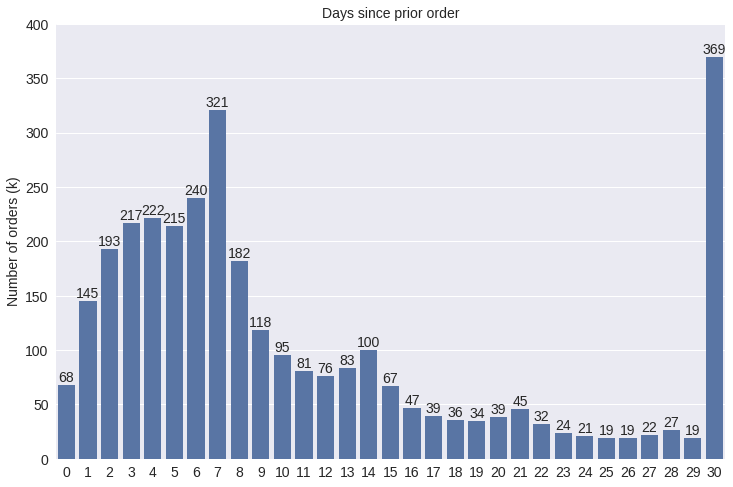

In [137]:
cnt_srs = orders_df.groupby("days_since_prior_order")['order_id'].aggregate('count')
cnt_srs.index = cnt_srs.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(cnt_srs.index, cnt_srs.values/1000,color=color[0])

annotate_bars(ax,fontsize=fs,offset=3)

plt.xlabel("")
plt.ylabel('Number of orders (k)',fontsize=fs)
plt.title('Days since prior order',fontsize=fs)

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.ylim(0,400)

Blabla. Note that the data seems to be capped at 30 days.

Percentage of products that are reordered

In [141]:
# percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.58969746679221613

In [142]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.59859441275096292

No products reordered

In [143]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


1    0.879151
0    0.120849
Name: reordered, dtype: float64

In [144]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


1    0.93444
0    0.06556
Name: reordered, dtype: float64

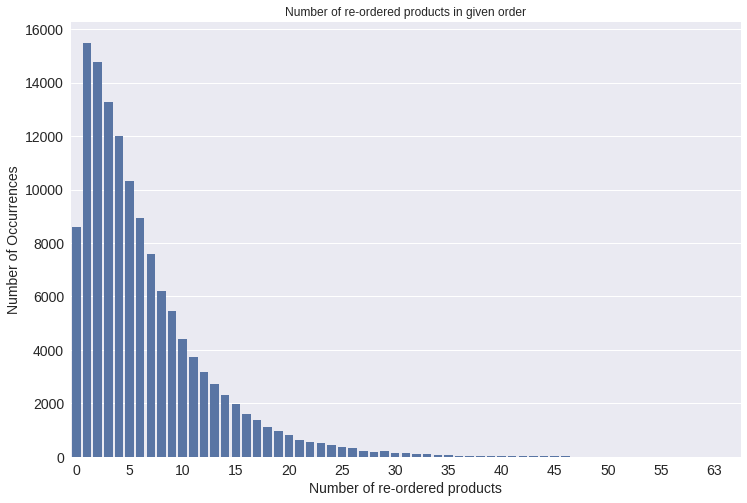

In [155]:
grouped_df = # Set every 5th label to visible
for label in ax.xaxis.get_ticklabels():
    label.set_visible(False)
for label in ax.xaxis.get_ticklabels()[::5]:
    label.set_visible(True).groupby(["order_id"])["reordered"].aggregate("sum").reset_index()
cnt_srs = grouped_df.reordered.value_counts()

plt.figure(figsize=(12,8))
ax = sns.barplot(cnt_srs.index, cnt_srs.values,color=color[0])
plt.ylabel('Number of Occurrences', fontsize=fs)
plt.xlabel('Number of re-ordered products', fontsize=fs)
plt.title("Number of re-ordered products in given order")

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

# Set every 5th label to visible
for label in ax.xaxis.get_ticklabels():
    label.set_visible(False)
for label in ax.xaxis.get_ticklabels()[::5]:
    label.set_visible(True)

Let's look at an example customer to see how this works

In [170]:
order_ids = orders_df[orders_df.user_id==1]['order_id']
orders_df[orders_df.user_id==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


Wee see that the customers have 10 orders where 9 is in the prior set and 1 is in the train set.

Now, we want to see what products the customer buys in each order.

In [186]:
for n in range(len(order_ids)-1):
    display(HTML("<br><b>Order number: " + str(n) + "</b>"))
    display(order_products_prior_df[order_products_prior_df.order_id == order_ids[n]])

display(HTML("<br><b>Order number: " + str(n+1) + "</b>"))
display(order_products_train_df[order_products_train_df.order_id == order_ids[len(order_ids)-1]])

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


,order_id,product_id,add_to_cart_order,reordered
22742744,2398795,196,1,1
22742745,2398795,10258,2,0
22742746,2398795,12427,3,1
22742747,2398795,13176,4,0
22742748,2398795,26088,5,1
22742749,2398795,13032,6,0


,order_id,product_id,add_to_cart_order,reordered
4488095,473747,196,1,1
4488096,473747,12427,2,1
4488097,473747,10258,3,1
4488098,473747,25133,4,0
4488099,473747,30450,5,0


,order_id,product_id,add_to_cart_order,reordered
21376074,2254736,196,1,1
21376075,2254736,12427,2,1
21376076,2254736,10258,3,1
21376077,2254736,25133,4,1
21376078,2254736,26405,5,1


,order_id,product_id,add_to_cart_order,reordered
4089398,431534,196,1,1
4089399,431534,12427,2,1
4089400,431534,10258,3,1
4089401,431534,25133,4,1
4089402,431534,10326,5,0
4089403,431534,17122,6,0
4089404,431534,41787,7,0
4089405,431534,13176,8,1


,order_id,product_id,add_to_cart_order,reordered
31927070,3367565,196,1,1
31927071,3367565,12427,2,1
31927072,3367565,10258,3,1
31927073,3367565,25133,4,1


,order_id,product_id,add_to_cart_order,reordered
5212927,550135,196,1,1
5212928,550135,10258,2,1
5212929,550135,12427,3,1
5212930,550135,25133,4,1
5212931,550135,13032,5,1


,order_id,product_id,add_to_cart_order,reordered
29474805,3108588,12427,1,1
29474806,3108588,196,2,1
29474807,3108588,10258,3,1
29474808,3108588,25133,4,1
29474809,3108588,46149,5,0
29474810,3108588,49235,6,0


,order_id,product_id,add_to_cart_order,reordered
21760443,2295261,49235,1,1
21760444,2295261,46149,2,1
21760445,2295261,25133,3,1
21760446,2295261,196,4,1
21760447,2295261,10258,5,1
21760448,2295261,12427,6,1


,order_id,product_id,add_to_cart_order,reordered
24181266,2550362,196,1,1
24181267,2550362,46149,2,1
24181268,2550362,39657,3,0
24181269,2550362,38928,4,0
24181270,2550362,25133,5,1
24181271,2550362,10258,6,1
24181272,2550362,35951,7,0
24181273,2550362,13032,8,1
24181274,2550362,12427,9,1


,order_id,product_id,add_to_cart_order,reordered
484420,1187899,196,1,1
484421,1187899,25133,2,1
484422,1187899,38928,3,1
484423,1187899,26405,4,1
484424,1187899,39657,5,1
484425,1187899,10258,6,1
484426,1187899,13032,7,1
484427,1187899,26088,8,1
484428,1187899,27845,9,0
484429,1187899,49235,10,1
